# Анализ магазина компьютерных игр

# Описание Проекта

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Знакомство с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import  seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Промежуточные выводы**

Датафрейм загружен корректно.

Из информации видны проблемы с наименвоаниями столбцов, есть пропуски, есть ошибки в определении типов данных столбцов.

Приступим к обработке данных и исправим неточности!

## Обработка, Подготовка данных

### Переименование столбцов

In [5]:
df.columns= df.columns.str.lower() #приводим наименования столбцов в нижний регистр
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Работа с пропусками и типами данных

In [6]:
def pass_value_barh(df): #функция распределения пропущеных значений по столбцам в барах
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

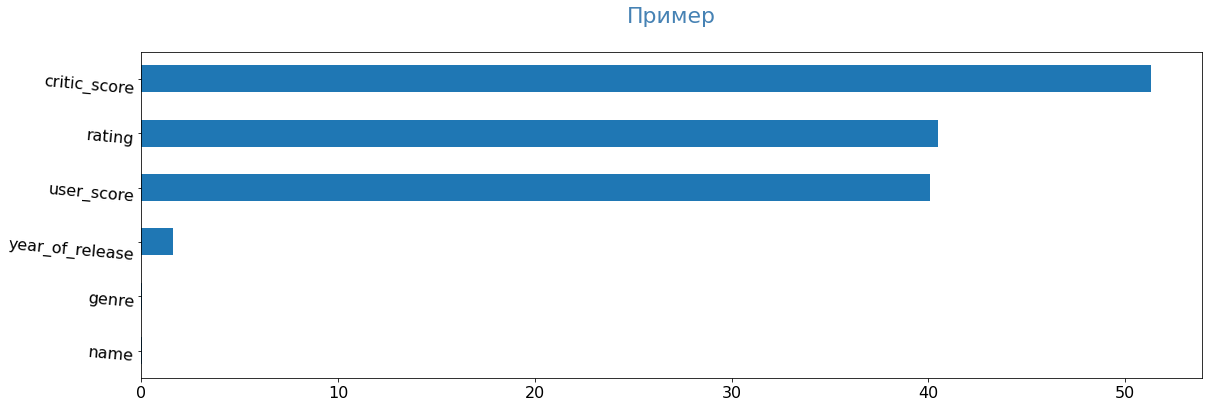

In [7]:
pass_value_barh(df)

In [8]:
print('Количество пропусков в столбце "year_of_release":', df.year_of_release.isna().sum())
print('Количество пропусков в столбце "name":', df.name.isna().sum())
print('Количество пропусков в столбце "genre":', df.genre.isna().sum())

Количество пропусков в столбце "year_of_release": 269
Количество пропусков в столбце "name": 2
Количество пропусков в столбце "genre": 2


В столбце "Год выпуска" всего 269 прпоусков, избавимся от них и приведем столбец к типу данных  int.

Оценки критиков по  100 бальной шкале, и оценки имеют целые значения. Большое количество пропусков. Заполнить пропуски значениями не представляется возможным, оставляем как есть.

Столбец с наименованиями и жанрами очищаем от пропусков.

In [9]:
# избавляемся от прпоусков и приводим столбцы к типам данных
df = df.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)
df.year_of_release = df.year_of_release.astype('int')
#df.critic_score = df.critic_score.fillna(0).astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [10]:
df.user_score.value_counts() #проверяем столбец с оценками на уникальные значения

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1         2
1.5       2
0.2       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

**To Be Determined**, то есть "Будет определено". Заполнять tbd нулями не считаю корректным, так как 0 - это конкретная оценка игры, при этом tbd означает, что оценка  для данной игры не определена. Заменим tbd на значения типа "NaN".

In [11]:
df.loc[df.user_score == 'tbd', 'user_score'] = np.nan
df.user_score = df.user_score.astype('float')
df.user_score.isna().sum()

8981

In [12]:
# check
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Подсчет суммарных продаж

In [13]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Промежуточные выводы

**На данном этапе были проделаны след. действия:**

- Переименованы все столбцы, переведены в нижний регистр.

- Обработаны пропуски. Пропуски в наименвоании игры и жанре могли возникнуть по техническим причинам. Возможно для игры не был определен конкретный жанр. В любом случае прпоуском было мало и мы от них избавились. По году выпуска игры причинами пропусков также могли послужить технические причины, возможно датафрейм был получен в результате обработки более большого набора данных, где были ошибки в определении и выделении года выпуска игры, что и привело к пропускам.

- Добавили в датафрейм столбцец с суммарными продажами по всем регионам

In [14]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
df['rating'] = df['rating'].fillna('unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Исследовательский анализ данных

### Количество выпущенных игр по годам

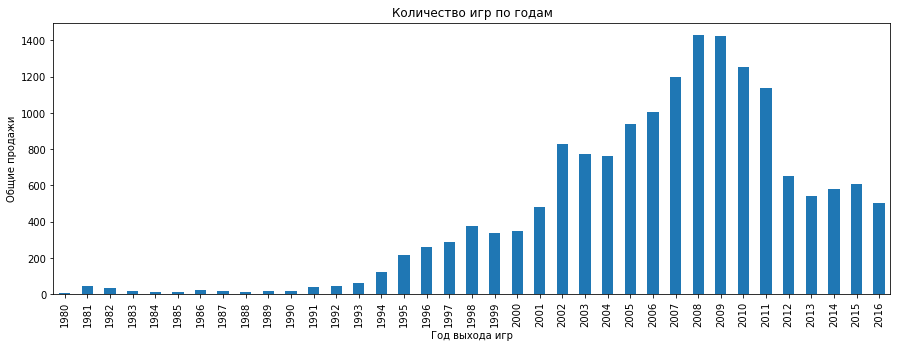

In [16]:
(
    df.pivot_table(index='year_of_release', values='total_sales', aggfunc='count')
    .plot(kind='bar', figsize=(15,5), title='количество игр по годам', legend=False)
    .set(title='Количество игр по годам', xlabel='Год выхода игр', ylabel='Общие продажи')
);


Явно видно, что данных с 1980 по 1991 слишком мало. Оставим данные за 1981 и 1982 годы, из всего набора они выделяются все таки.

Итак: 1981 и 1982 - оставляем, остальное убираем вплоть до 1991 года.

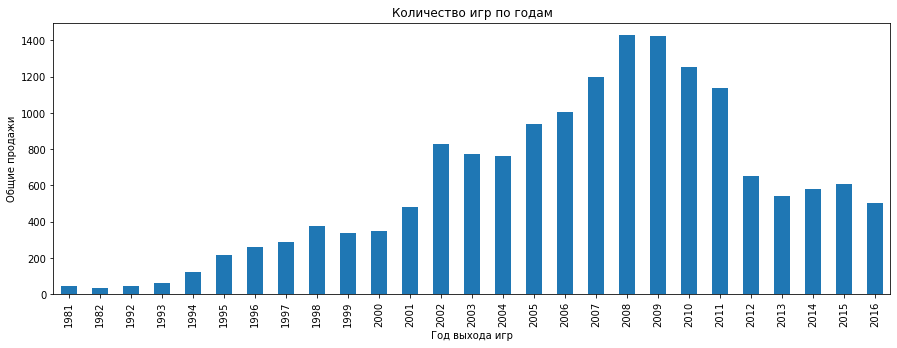

In [17]:
df = df.query('year_of_release > 1991 or year_of_release == 1981 or year_of_release == 1982')
(
    df.pivot_table(index='year_of_release', values='total_sales', aggfunc='count')
    .plot(kind='bar', figsize=(15,5), title='количество игр по годам', legend=False)
    .set(title='Количество игр по годам', xlabel='Год выхода игр', ylabel='Общие продажи')
);


### Изменение продаж по платформам, определение актуального периода.

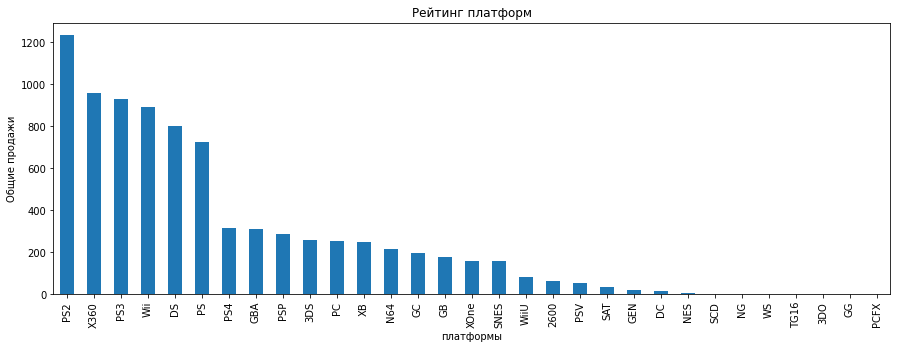

In [18]:
(
    df.pivot_table(index='platform', values='total_sales', aggfunc='sum')['total_sales']
    .sort_values(ascending=False).plot(kind='bar', figsize=(15,5))
    .set(title='Рейтинг платформ', xlabel='платформы', ylabel='Общие продажи')
);

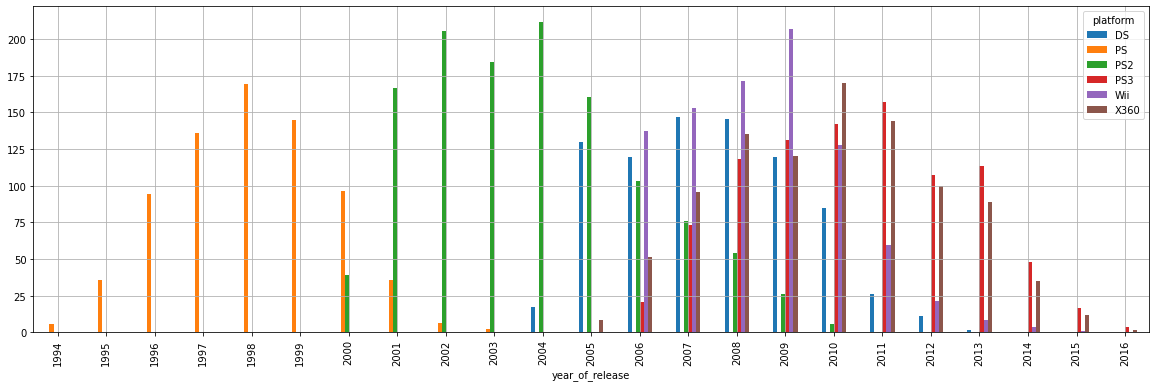

In [19]:
pl = ['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS']
(
    df.query('platform in @pl').pivot_table(index='year_of_release',  columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(20,6),  grid=True)
);

В среднем выбранные платформы живут порядка 10 лет, постепенно теряя актуальность после 5 лет с момента выхода, и заменяются новыми платформами. 

5 лет большой период, что бы считать его актуальным для прогнозирования продаж. Предлагаю взять период - 3 года. 

### Исследование популярных платформ

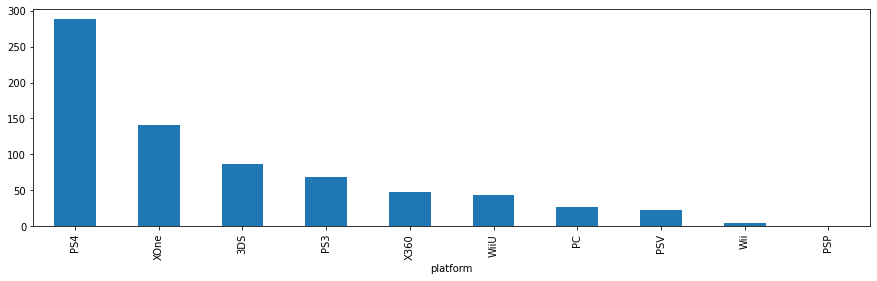

In [20]:
actual_df = df.query('year_of_release >= 2014')
(
    actual_df.pivot_table(index='platform', values='total_sales',  aggfunc='sum')['total_sales']
    .sort_values(ascending=False)
    .plot(kind='bar', figsize=(15,4))
);

Тройка лидеров - PS4, XOne и 3DS

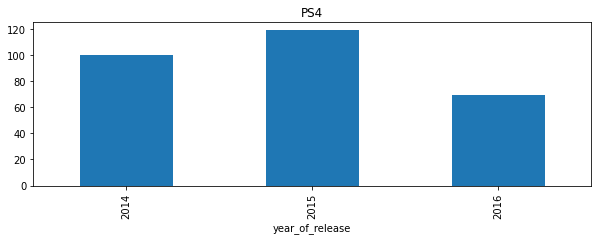

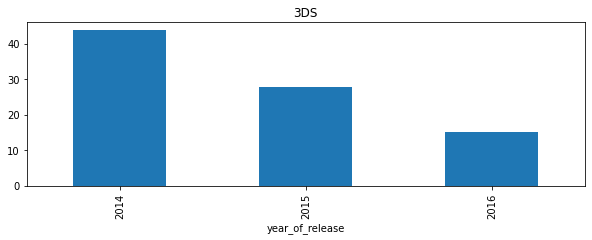

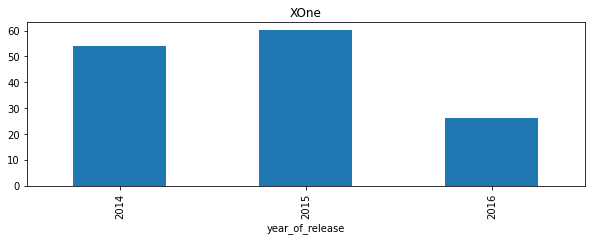

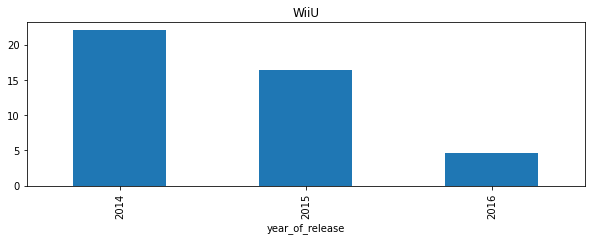

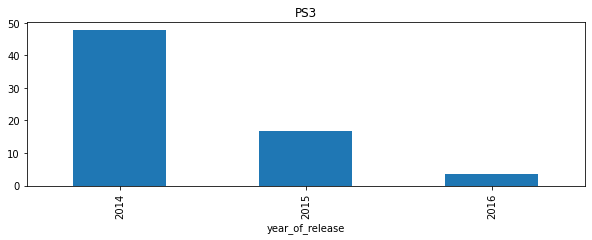

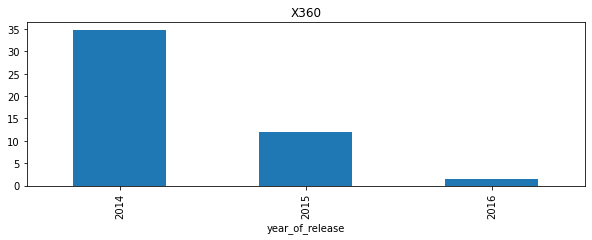

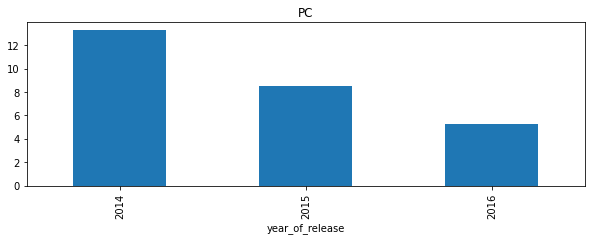

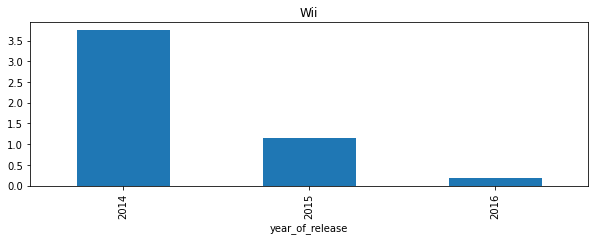

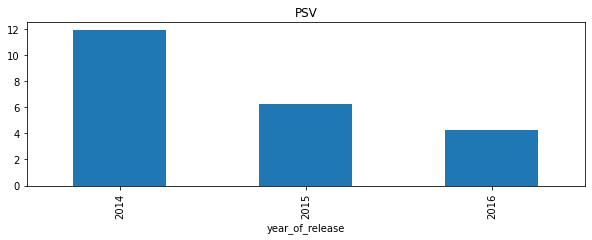

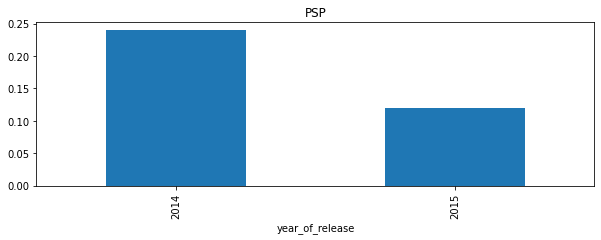

In [21]:
per_pl =  actual_df.platform.unique()
for y in per_pl:
    (actual_df.query('platform == @y')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar',figsize=(10,3), title=y, legend=False)
    );

In [22]:
print('количество данных за 2016 год:', len(actual_df.query('year_of_release == 2016')))

количество данных за 2016 год: 502


PS4, XOne, 3DS, PC можно  считать потенциально прибыльными, т.к. на графиках показывается рост продаж, при этом падение к 2016 году  связано с малым  количеством данных.

### График «ящик с усами»

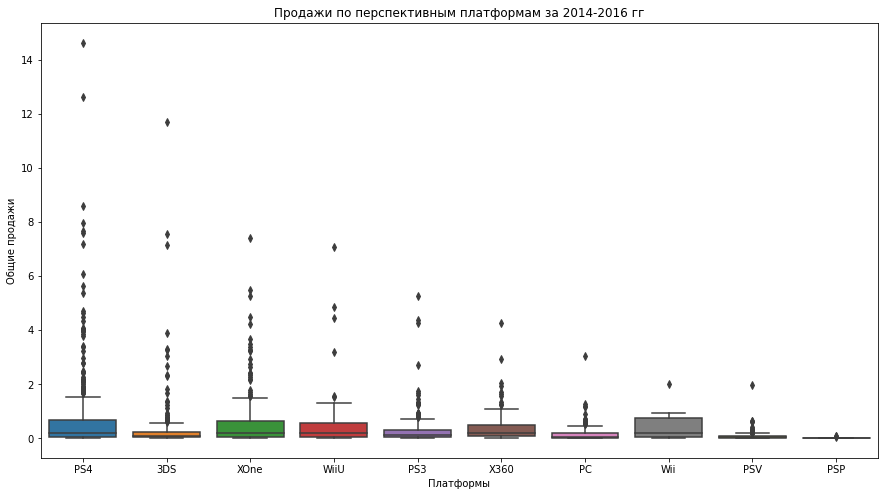

In [23]:
plt.figure(figsize=(15, 8))
sns.boxplot(data = actual_df, y = 'total_sales', x='platform').set(
    title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи');

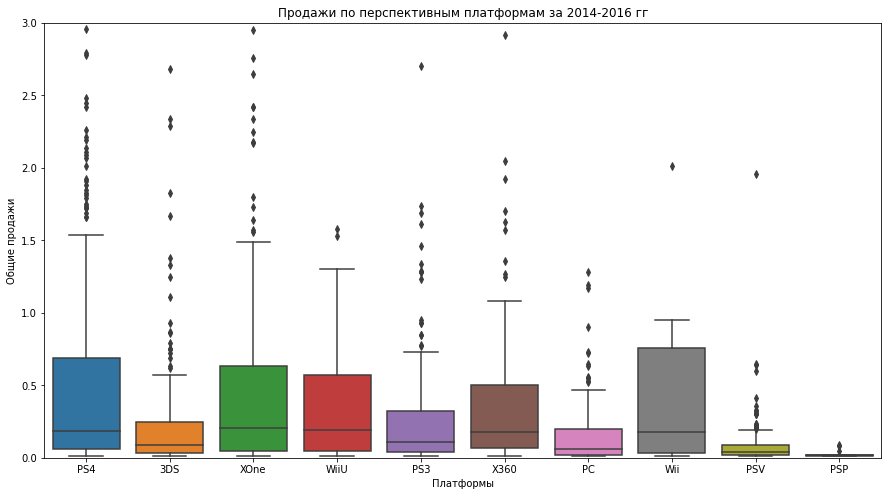

In [24]:
plt.figure(figsize=(15, 8))
sns.boxplot(data = actual_df, y = 'total_sales', x='platform').set(
    title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3));

In [25]:
actual_df.pivot_table(index='platform', values = 'total_sales', aggfunc = ['describe'])

describe                                                       
              25%    50%     75%  count    max      mean   min       std
platform                                                                
3DS        0.0300  0.090  0.2500  212.0  11.68  0.408868  0.01  1.188368
PC         0.0200  0.060  0.2000  151.0   3.05  0.179139  0.01  0.329359
PS3        0.0400  0.110  0.3250  219.0   5.27  0.311324  0.01  0.633059
PS4        0.0575  0.185  0.6900  376.0  14.63  0.766356  0.01  1.614969
PSP        0.0100  0.020  0.0200   13.0   0.09  0.027692  0.01  0.027735
PSV        0.0200  0.040  0.0900  295.0   1.96  0.075932  0.01  0.141591
Wii        0.0350  0.180  0.7550   11.0   2.01  0.460909  0.01  0.625451
WiiU       0.0500  0.190  0.5700   73.0   7.09  0.588767  0.01  1.161467
X360       0.0700  0.180  0.5050  111.0   4.28  0.434414  0.01  0.628967
XOne       0.0500  0.205  0.6325  228.0   7.39  0.615614  0.01  1.046513

Из графиков и численных значений видим, что размахи продаж сильно отличаются на разных платформах, при этом медианные значения в среднем примерно на одном уровне 0,1 - 0,2 млн копий. Большое количество выбросов на определенных платформах говорит о том, что у некоторых игр этих платформ были большие продажи.

### Влияние отзывов на продажи

Для анализа влияния оценок пользоваталей и критиков на продажи исследуем данные по платформе PS4:

In [26]:
# сделаем сводную таблицу по платформе PS4
corr_score = (
    actual_df.query('platform == "PS4"')
    .pivot_table(index='total_sales', values=['user_score', 'critic_score'], aggfunc='median')
    .reset_index()
    
) 

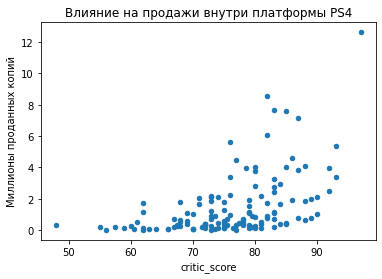

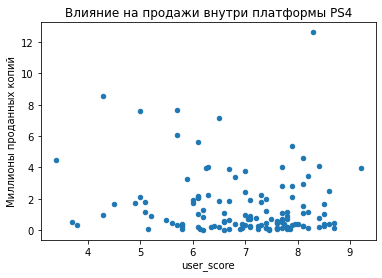

In [27]:
for name in ['critic_score', 'user_score']:
    corr_score.plot(x=name, y='total_sales', kind='scatter').set(title='Влияние на продажи внутри платформы PS4',
                                                                 ylabel='Миллионы проданных копий');


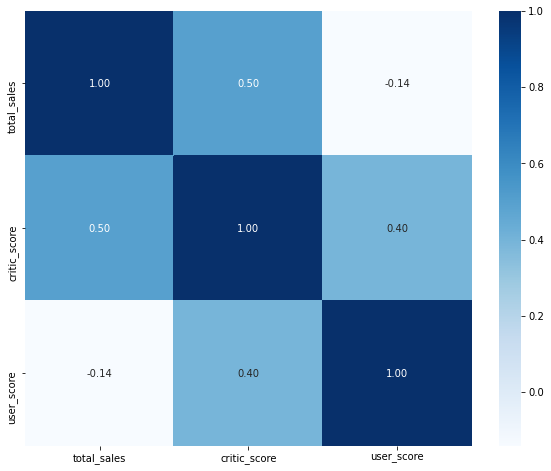

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_score.corr(),  annot=True, cmap='Blues', fmt='.2f');

Умеренная зависимость продаж от оценок критиков. С ростом оценки критиков растут объемы продаж, при этом разброс продаж также увеличивается. Что не скажешь о оценке пользователей. В данном случае зависимость отрицательная. оценки пользователей не влияют на продажи.


Посмотрим на зависимость продаж от оценок критиков и пользователей по другим платформам

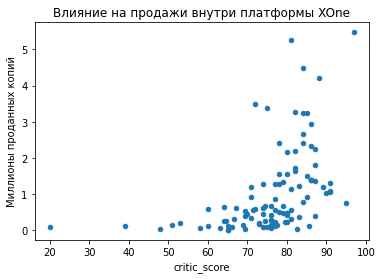

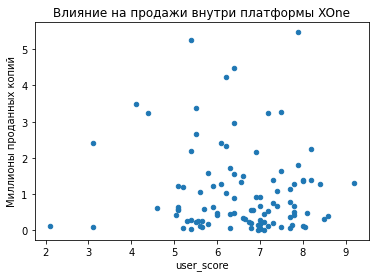

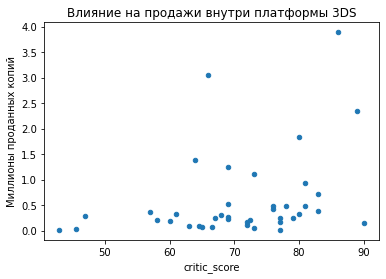

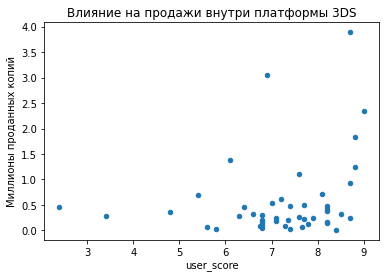

In [29]:
per_plat = ['XOne','3DS']

for p in per_plat:
    XOne_3DS = (
        actual_df.query('platform == @p')
        .pivot_table(index='total_sales', values=['user_score', 'critic_score'], aggfunc='median')
        .reset_index()
    )
    for name in ['critic_score', 'user_score']:
        XOne_3DS.plot(x=name, y='total_sales', kind='scatter').set(title=f'Влияние на продажи внутри платформы {p}',
                                                                 ylabel='Миллионы проданных копий');


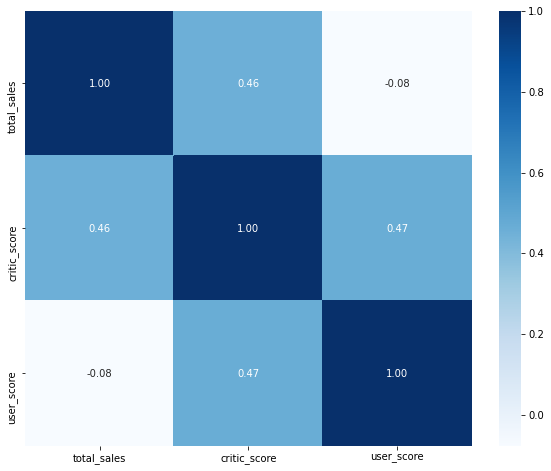

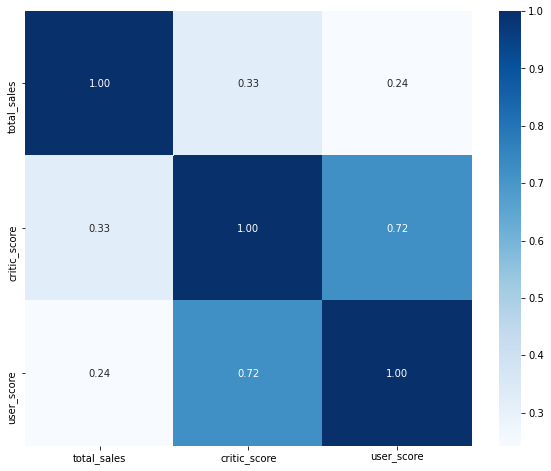

In [30]:
per_plat = ['XOne','3DS']
for p in per_plat:
    XOne_3DS = (
        actual_df.query('platform == @p')
        .pivot_table(index='total_sales', values=['user_score', 'critic_score'], aggfunc='median')
        .reset_index()
    )
    plt.figure(figsize=(10,8))
    sns.heatmap(XOne_3DS.corr(),  annot=True, cmap='Blues', fmt='.2f');

Зависимость оценок критиков по платформам XOne и 3DS также есть, у платформы 3DS она больше.
Зависимость от оценок пользователей немного меняется. Так по платформе XOne она так же отрицательная, а вот 3DS зависит от оценок пользователей больше, чем другие сравниваемые платформы.

### Распределение игр по жанрам

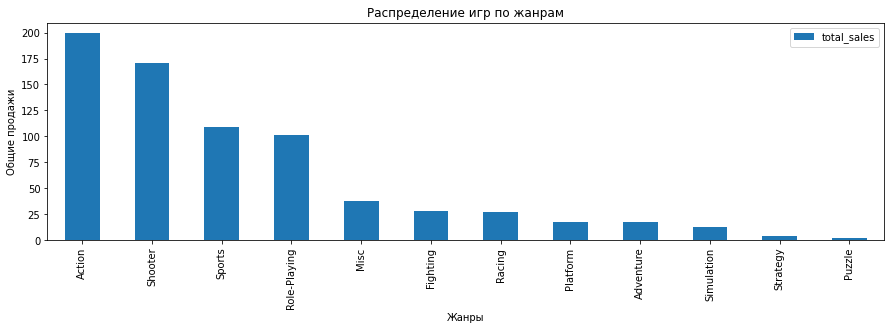

In [31]:
# построим график распределения общих продаж по жанрам.
(
    actual_df.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by= 'total_sales', ascending=False)
    .plot(kind='bar', figsize=(15,4)).set(title='Распределение игр по жанрам',
                                          xlabel='Жанры',
                                          ylabel='Общие продажи')
);

Исходя из графика - лидер продаж - жанр экшн, на втором месте шутеры и так далее по графику.

Из одного графика сложно понять так ли это. Попробуем посмотреть на количество игр по жанрам, т.к. от  количества также зависят суммарные продажи.

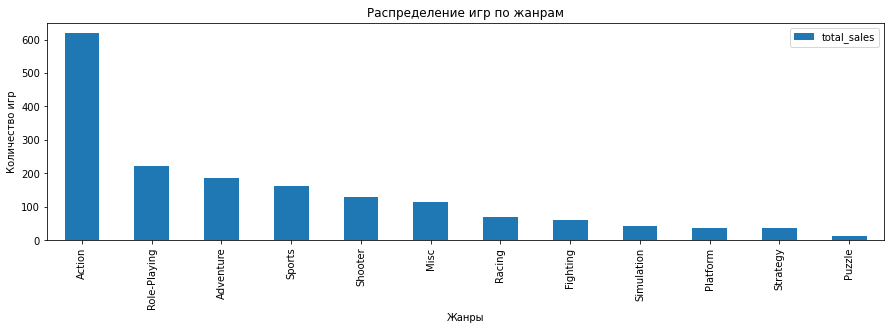

In [32]:
# построим график распределения количество игр по жанрам.
(
    actual_df.pivot_table(index='genre', values='total_sales', aggfunc='count')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', figsize=(15,4)).set(title='Распределение игр по жанрам',
                                          xlabel='Жанры',
                                          ylabel='Количество игр')
);

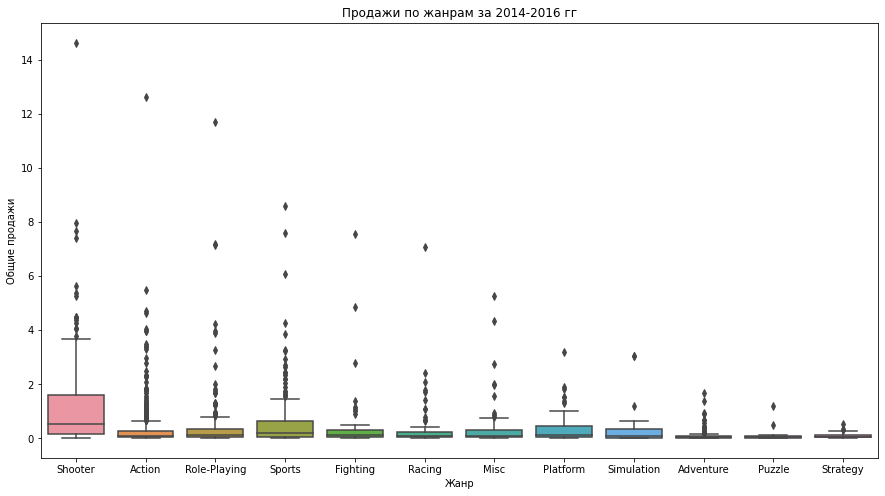

In [33]:
plt.figure(figsize=(15, 8))
sns.boxplot(data = actual_df, y = 'total_sales', x='genre').set(
    title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Жанр', ylabel = 'Общие продажи');

In [34]:
actual_df.query('total_sales > 11')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68


GTA - не стареющая классика) 

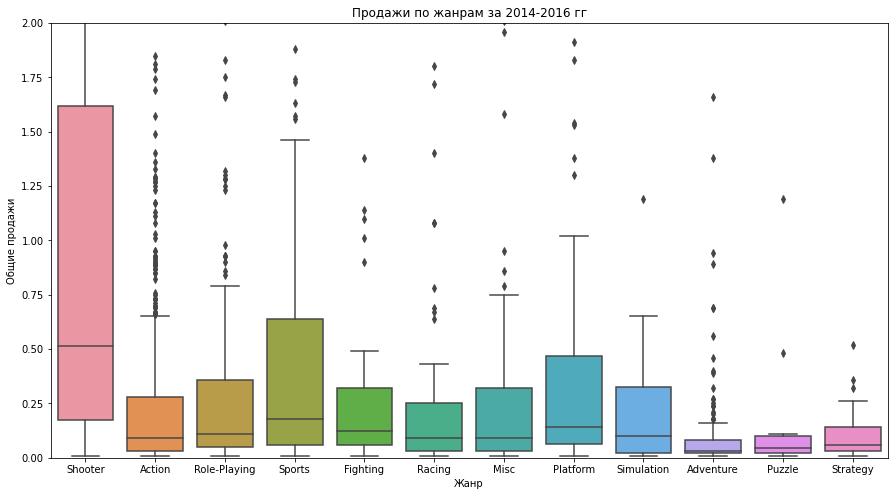

In [35]:
plt.figure(figsize=(15, 8))
sns.boxplot(data = actual_df, y = 'total_sales', x='genre').set(
    title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Жанр', ylabel = 'Общие продажи', ylim=(0, 2));

Явный фаворит по количеству вышедших игр - жанр  экшн, этим можно обьяснить результат общих продаж.Чем больше количество, тем больше продажи по жанру.

В свою очередь наиболее прибыльным жанром однозначно являются шутеры. Из последнх графиком можно увидеть, что количество игр в данном жанре гораздо меньше, чем Экшн-игр, продажи игр в жанре "шутер" более стабильны.

### Промежуточные выводы

На этапе ИА:

1. Посмотрели на количество выпущенных игр по годам, избавились от редких значений (80, 83-90  года).
2. Определили жизненный цикл и актуальный период (3 года) для проведения прогнозирования следующий год.
3. Определили популярные платформы. Потенциально прибыльными считаем PS4, XOne и 3DS.
4. Построили  график "ящик  с усами":
- Размахи продаж сильно отличаются на разных платформах, при этом медианные значения в среднем примерно на одном уровне 0,1 - 0,2 млн копий. Большое количество выбросов на определенных платформах говорит о том, что у некоторых игр этих платформ были большие продажи.
5. Оценили влияние оценок на продажи.
- **PS** Умеренная зависимость продаж от оценок критиков. С ростом оценки критиков растут объемы продаж, при этом разброс продаж также увеличивается. Что не скажешь о оценке пользователей. В данном случае зависимость отрицательная. оценки пользователей не влияют на продажи.
- **XOne** и **3DS** Зависимость оценок критиков по платформам XOne и 3DS также есть, у платформы 3DS она больше. Зависимость от оценок пользователей немного меняется. Так по платформе XOne она так же отрицательная, а вот 3DS зависит от оценок пользователей больше, чем другие сравниваемые платформы.
6. Оценили продажи игр по жанрам.
- Экшн-игры лидируют по  продажам за счет большого количества выпущенных игр, при этом на 1 игру в жанрах  шутер и спорт приходится больше продаж, чем на 1 игру жанра экшн.

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5).

In [36]:
def popular_platf(val) :
    top_5 = actual_df.groupby('platform')[[val]].sum().sort_values(by=val, ascending=False).head().reset_index()
    t = actual_df.groupby('platform')[[val]].sum().sort_values(by=val, ascending=False)[5:]
    others = {'platform': 'others_platform', val: t[val].sum()}
    top5_and_others = top_5.append(others, ignore_index=True).set_index('platform')
    return top5_and_others
   

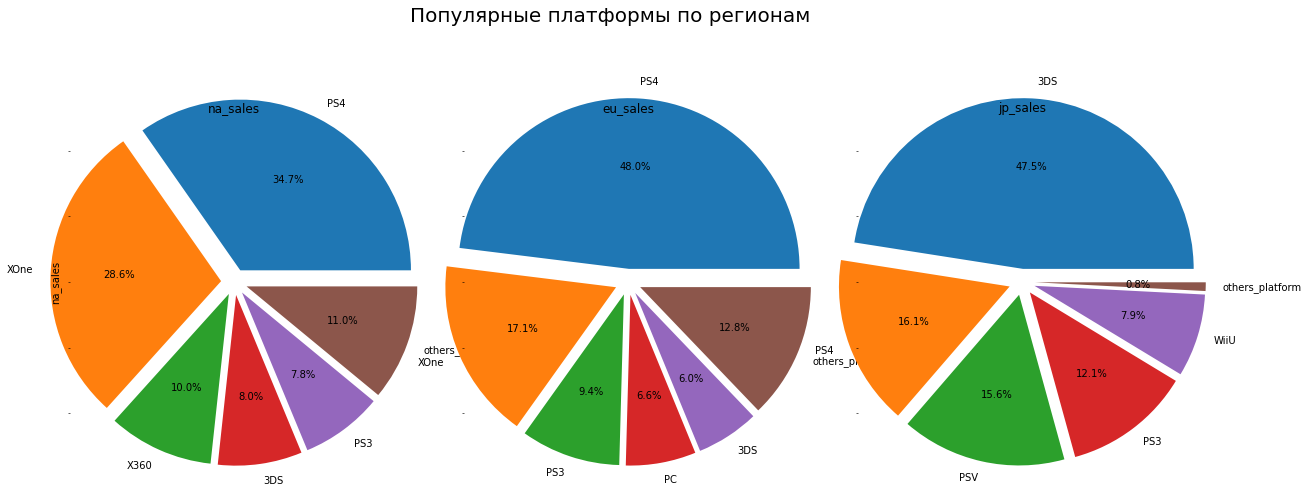

In [37]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, sharey=True, figsize=(20,8))
fig.suptitle('Популярные платформы по регионам', fontsize=20)
popular_platf('na_sales').plot(kind='pie', radius=1.3,
                               y='na_sales', legend=False, ax=ax0,
                               autopct='%.1f%%', explode=(0.1,0.1,0.1,0.1,0.1,0.1));
ax0.set(title='na_sales');

popular_platf('eu_sales').plot(kind='pie', radius=1.3,
                               y='eu_sales', legend=False, ax=ax1,
                               autopct='%.1f%%', explode=(0.1,0.1,0.1,0.1,0.1,0.1));
ax1.set(title='eu_sales');

popular_platf('jp_sales').plot(kind='pie', radius=1.3,
                               y='jp_sales', legend=False, ax=ax2,
                               autopct='%.1f%%', explode=(0.1,0.1,0.1,0.1,0.1,0.1));
ax2.set(title='jp_sales');

В Северной   Америке и Европе популярнее всего PS4. Причем в Северной америке разрыв не такой большой, как в Европе  (В европе разрыв составляет 31,4%). Лично меня в Sony привлекают  качественные эксклюзивки (к примеру God of War, или всякие игры  на компанию). Не исключено, что у данной платформы гораздо  мощнее рекламные кампании.

В Японии весь топ занимают японские платформы. С гигантским разрывом лидирует платформа 3DS. Можно заметить, что в топ 3 попадают портативные консоли 3DS и PSV. Что не скажешь о Северной Америке и Европе, где 3DS занимает 4 и  5 места соответственно. 

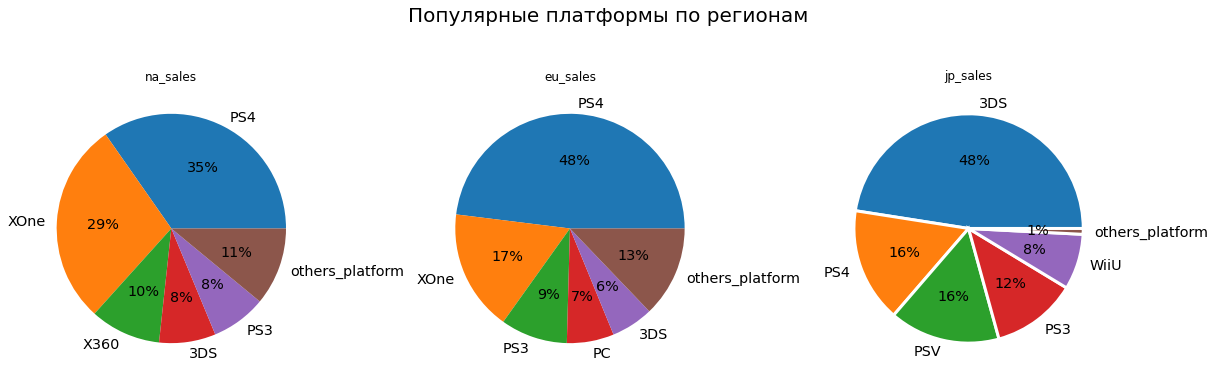

In [38]:
# check 

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(17,6))
fig.suptitle('Популярные платформы по регионам', fontsize=20)
popular_platf('na_sales').plot(kind='pie', 
                               y='na_sales', legend=False, ax=ax0,
                               autopct='%.0f%%', textprops={'size': 'x-large'});
ax0.set(title='na_sales', ylabel='');

popular_platf('eu_sales').plot(kind='pie', 
                               y='eu_sales', legend=False, ax=ax1,
                               autopct='%.0f%%', textprops={'size': 'x-large'});
ax1.set(title='eu_sales', ylabel='');

popular_platf('jp_sales').plot(kind='pie',  y='jp_sales', legend=False, ax=ax2,
                               autopct='%.0f%%', textprops={'size': 'x-large'},
                               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'});
ax2.set(title='jp_sales', ylabel='')
plt.tight_layout();

### Самые популярные жанры (топ-5).

In [39]:
def popular_genre (val):
    top_5 = actual_df.groupby('genre')[[val]].sum().sort_values(by=val, ascending=False).head().reset_index()
    t = actual_df.groupby('genre')[[val]].sum().sort_values(by=val, ascending=False)[5:]
    others = {'genre': 'others_genres', val: t[val].sum()}
    top5_and_others = top_5.append(others, ignore_index=True).set_index('genre')
    top5_and_others.plot(kind='pie', radius=1.6, y=val, legend=False, autopct='%.1f%%', explode=(0.1,0.1,0.1,0.1,0.1,0.1))
    
    plt.title(val +'\n'*3, size=15)
    plt.show()

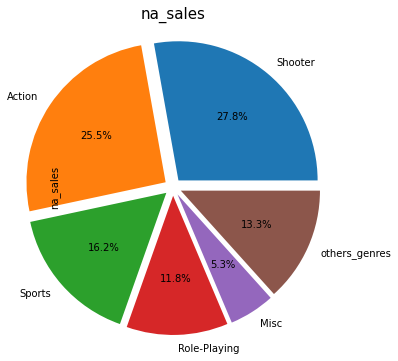

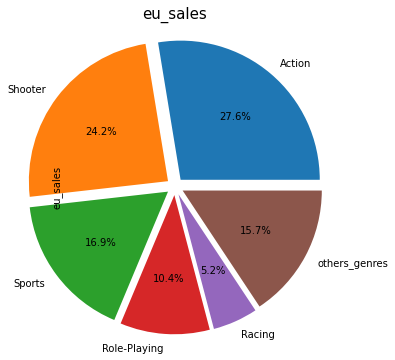

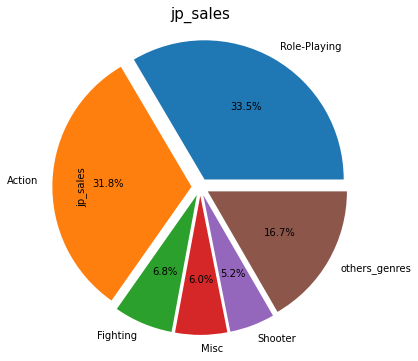

In [40]:
popular_genre('na_sales')
popular_genre('eu_sales')
popular_genre('jp_sales')

Картина по предпочтениям жанров американцев и европейцев похожа. Отличия минимальны. Популярные жанры Action и Shooter.

На этом фоне Япония снова выделяется - первое место среди всех жанров занимают ролевые игры, а именно японские ролевые игры (JRPG), которые там безумно популярны, а так же известны во всем мире. JRPG можно смело выделить как отдельный жанр. Выше мы выяснили, что в Японии популярнее всего портативные консоли. Именно на них в огромном количестве выпускают JRPG, которые в большом количестве разрабатываются исключительно для внутреннего рынка. Поэтому там очень долго остается "вживых" та же PSV, которая провалилась в мировых продажах.

### Влияние рейтинга ESRB на продажи в отдельном регионе.

Для начала разберем, что такое рейтинг **ESRB**.

**Entertainment Software Rating Board (ESRB)** — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

Классификация рейтинга:

**EC** - Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница.

**E** - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: FIFA.

**E 10+** - Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons.

**T** - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.

**M** - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры:  Destiny 2.

**AO** - Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.

**RP** - Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

In [41]:
actual_df['rating'].unique()

array(['unknown', 'M', 'E', 'T', 'E10+'], dtype=object)

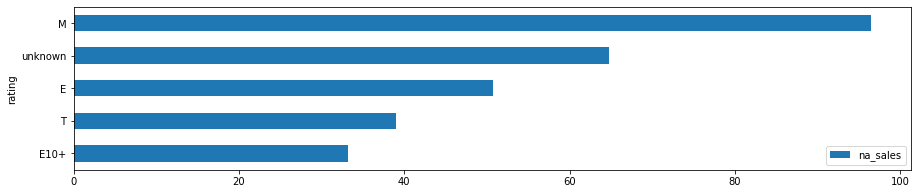

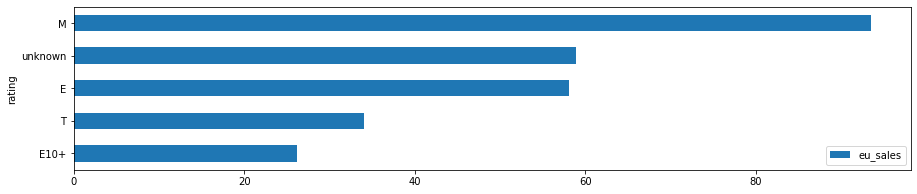

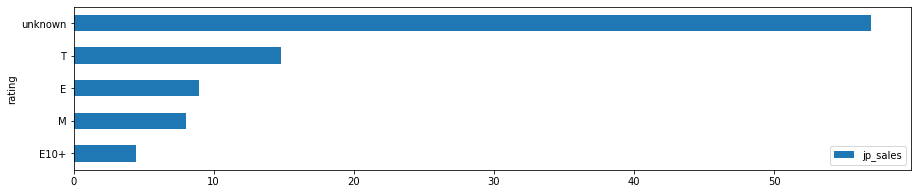

In [42]:
for r in ['na_sales', 'eu_sales', 'jp_sales']:
    (
        actual_df.pivot_table(index='rating', values=r, aggfunc='sum')[r]
        .reset_index().sort_values(by=r).set_index('rating')
        .plot(kind='barh', figsize=(15,3))
    );

Геймеры из Европы и Северной Америки отдают предпочтения играм с рейтингом **М**, что соответствует  предпочтениям в жанрах (Шутеры и Экшн). В Европе игры с аналогичным рейтингом будут обозначаться **PEGI 16**. Это объясняется тем, что игры с заявкой на реализм достаточно давно претендуют на первенство в игровой индустрии, а, как правило, геймеры из Европы и Штатов раньше всех следуют тенденциям.

В свою очередь пропуски в данных по рейтингу, которые мы заполнили категорией "не известен" имеют очень большой вес в наборе данных. 

И тут Япония выделяется. Очень большой вес по региону имеют значения unknown, что не удивительно, ведь рейтинг ESRB предназначен для США и Канады. В целом исследование данного региона показало, что Япония больше ориентирована на внутренний рынок платформ и игр. Большинство предпочитает игры с рейтингом **T**, в Японии обозначается как рейтинг **A** по системе **CERO**.

### Промежуточные выводы

**1. Самые популярные жанры (топ-5):**

В Северной   Америке и Европе популярнее всего PS4. Причем в Северной америке разрыв не такой большой, как в Европе  (В европе разрыв составляет 31,4%). Лично меня в Sony привлекают  качественные эксклюзивки (к примеру God of War, или всякие игры  на компанию). Не исключено, что у данной платформы гораздо  мощнее рекламные кампании.

В Японии весь топ занимают японские платформы. С гигантским разрывом лидирует платформа 3DS. Можно заметить, что в топ 3 попадают портативные консоли 3DS и PSV. Что не скажешь о Северной Америке и Европе, где 3DS занимает 4 и  5 места соответственно. 

**2. Самые популярные платформы (топ-5).**

Картина по предпочтениям жанров американцев и европейцев похожа. Отличия минимальны. Популярные жанры Action и Shooter.

На этом фоне Япония снова выделяется - первое место среди всех жанров занимают ролевые игры, а именно японские ролевые игры (JRPG), которые там безумно популярны, а так же известны во всем мире. JRPG можно смело выделить как отдельный жанр. Выше мы выяснили, что в Японии популярнее всего портативные консоли. Именно на них в огромном количестве выпускают JRPG, которые в большом количестве разрабатываются исключительно для внутреннего рынка. Поэтому там очень долго остается "вживых" та же PSV, которая провалилась в мировых продажах.

**3. Влияние рейтинга ESRB на продажи в отдельном регионе.**

Геймеры из Европы и Северной Америки отдают предпочтения играм с рейтингом М, что соответствует предпочтениям в жанрах (Шутеры и Экшн). В Европе игры с аналогичным рейтингом будут обозначаться PEGI 16. Это объясняется тем, что игры с заявкой на реализм достаточно давно претендуют на первенство в игровой индустрии, а, как правило, геймеры из Европы и Штатов раньше всех следуют тенденциям.

И тут Япония выделяется. Большинство предпочитает игры с рейтингом T, в Японии обозначается как рейтинг A по системе CERO.



## Проверка гипотез

- **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Проверим гипотезы с помощью t-test.

Сформулируем гипотезы:

**H_0:** средние пользовательские оценки (user_score) XOne = средние пользовательские оценки PC.

**H_a:** средние пользовательские оценки (user_score) XOne ≠ средние пользовательские оценки PC.

alpha = 0.05 — критический уровень статистической значимости, общепринятое значение в 5%.

In [43]:
print('размер выборки платформы XOne:', actual_df.query('platform == "XOne"')['user_score'].count())
print('размер выборки платформы PC:', actual_df.query('platform == "PC"')['user_score'].count())

размер выборки платформы XOne: 165
размер выборки платформы PC: 122


Так как выборки разного размера, параметр equal_var возьмем как False

In [44]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    actual_df.query('platform == "XOne"')['user_score'],
    actual_df.query('platform == "PC"')['user_score'], 
    equal_var = False, nan_policy='omit'
)
# alpha
alpha = .05
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


**p-value** - Это вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна.

Средние пользовательские оценки на XOne и PC приблизительно равны. Возможно, потому что обе платформы от Microsoft и  большинство игр могут быть общими для двух платформ, соответственно и оценки - общие.

In [45]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


- **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**


Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Также используем t-test.

Сформулируем гипотезы:

**H_0:** средние пользовательские рейтинги жанров Action и Sports равны

**H_a:** средние пользовательские рейтинги жанров Action и Sports различаются

alpha = 0.05 — критический уровень статистической значимости, общепринятое значение в 5%.

In [46]:
print('размер выборки жанра Action:', actual_df.query('genre == "Action"')['user_score'].count())
print('размер выборки жанра Sports:', actual_df.query('genre == "Sports"')['user_score'].count())

размер выборки жанра Action: 297
размер выборки жанра Sports: 127


Так как выборки разного размера, параметр equal_var возьмем как False

In [47]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    actual_df.query('genre == "Action"')['user_score'],
    actual_df.query('genre == "Sports"')['user_score'], 
    equal_var = False, nan_policy='omit'
)
# alpha
alpha = .05
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.182555038264477e-14
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

В ходе проведения проекта  мы проделали большую работу.

- ***Обработали и подготовили данные к анализу.*** 
1. Переименовали все столбцы, перевели в нижний регистр.
2. Обработали пропуски. Пропуски в наименвоании игры и жанре могли возникнуть по техническим причинам. Возможно для игры не был определен конкретный жанр. В любом случае пропусков было мало и мы от них избавились. По году выпуска игры причинами пропусков также могли послужить технические причины, возможно датафрейм был получен в результате обработки более большого набора данных, где были ошибки в определении и выделении года выпуска игры, что и привело к пропускам. Пропуски по рейтингу ESRB могли возникнуть из-за сущности самого рейтинга. Данный рейниг ориентирован на  рынок США и Канады. Для устранения прпоусков можно было взять также рейтинги для Европы и Японии (**PEGI** **CERO**)
3. Добавили в датафрейм столбцец с суммарными продажами по всем регионам

- ***Провели исследовательский анализ.***
1. Посмотрели на количество выпущенных игр по годам, избавились от редких значений (80, 83-90  года).
2. Определили жизненный цикл и актуальный период (3 года) для проведения прогнозирования следующий год.
3. Определили популярные платформы. Потенциально прибыльными считаем PS4, XOne и 3DS, а также PC.
4. Построили  график "ящик  с усами":
Размахи продаж сильно отличаются на разных платформах, при этом медианные значения в среднем примерно на одном уровне 0,1 - 0,2 млн копий. Большое количество выбросов на определенных платформах говорит о том, что у некоторых игр этих платформ были большие продажи.
5. Оценили влияние оценок на продажи.

**PS** Умеренная зависимость продаж от оценок критиков. С ростом оценки критиков растут объемы продаж, при этом разброс продаж также увеличивается. Что не скажешь о оценке пользователей. В данном случае зависимость отрицательная. оценки пользователей не влияют на продажи.

**XOne** и **3DS** Зависимость оценок критиков по платформам XOne и 3DS также есть, у платформы 3DS она больше. Зависимость от оценок пользователей немного меняется. Так по платформе XOne она так же отрицательная, а вот 3DS зависит от оценок пользователей больше, чем другие сравниваемые платформы.
6. Оценили продажи игр по жанрам.

Экшн-игры лидируют по  продажам за счет большого количества выпущенных игр, при этом на 1 игру в жанрах  шутер и спорт приходится больше продаж, чем на 1 игру жанра экшн.

- ***Построили портрет пользователя каждого региона.***
1. Самые популярные жанры (топ-5):

В Северной   Америке и Европе популярнее всего PS4. Причем в Северной америке разрыв не такой большой, как в Европе  (В европе разрыв составляет 31,4%). Лично меня в Sony привлекают  качественные эксклюзивки (к примеру God of War, или всякие игры  на компанию). Не исключено, что у данной платформы гораздо  мощнее рекламные кампании.

В Японии весь топ занимают японские платформы. С гигантским разрывом лидирует платформа 3DS. Можно заметить, что в топ 3 попадают портативные консоли 3DS и PSV. Что не скажешь о Северной Америке и Европе, где 3DS занимает 4 и  5 места соответственно. 

2. Самые популярные платформы (топ-5).

Картина по предпочтениям жанров американцев и европейцев похожа. Отличия минимальны. Популярные жанры Action и Shooter.

На этом фоне Япония снова выделяется - первое место среди всех жанров занимают ролевые игры, а именно японские ролевые игры (JRPG), которые там безумно популярны, а так же известны во всем мире. JRPG можно смело выделить как отдельный жанр. Выше мы выяснили, что в Японии популярнее всего портативные консоли. Именно на них в огромном количестве выпускают JRPG, которые в большом количестве разрабатываются исключительно для внутреннего рынка. Поэтому там очень долго остается "вживых" та же PSV, которая провалилась в мировых продажах.

3. Влияние рейтинга ESRB на продажи в отдельном регионе.

Геймеры из Европы и Северной Америки отдают предпочтения играм с рейтингом **М**, что соответствует  предпочтениям в жанрах (Шутеры и Экшн). В Европе игры с аналогичным рейтингом будут обозначаться **PEGI 16**. Это объясняется тем, что игры с заявкой на реализм достаточно давно претендуют на первенство в игровой индустрии, а, как правило, геймеры из Европы и Штатов раньше всех следуют тенденциям.

В свою очередь пропуски в данных по рейтингу, которые мы заполнили категорией "не известен" имеют очень большой вес в наборе данных. 

И тут Япония выделяется. Очень большой вес по региону имеют значения unknown, что не удивительно, ведь рейтинг ESRB предназначен для США и Канады. В целом исследование данного региона показало, что Япония больше ориентирована на внутренний рынок платформ и игр. Большинство предпочитает игры с рейтингом **T**, в Японии обозначается как рейтинг **A** по системе **CERO**.

- ***Провели проверку гипотез.***
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Средние пользовательские оценки на XOne и PC приблизительно равны. Возможно, потому что обе платформы от Microsoft и большинство игр могут быть общими для двух платформ, соответственно и оценки - общие.

2.  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Средние пользовательские рейтинги жанров Action и Sports разные.

Спасибо!